# Food-101 Nutritional Information 
 #### Nutritional Information for Food-101 Dishes – Calories, Protein, Carbs & More!

About Dataset
📝 Dataset Overview
This dataset provides nutritional information for the 101 food categories in the popular Food-101 dataset. Each food type is enriched with calories, protein, fat, carbs, and other nutritional data per 100 grams or per serving. It is intended to help data scientists, researchers, and developers who are working on food classification, nutrition estimation, or AI-powered health applications.

🔗 Source and Inspiration
The Food-101 dataset, a widely used benchmark dataset for food classification, lacked comprehensive nutritional data. This dataset was created to bridge that gap by providing accurate, research-based nutritional values for each food class. The information has been compiled from reliable sources such as USDA Food Database, and verified nutrition resources.

📊 What’s Included
101 Food Categories matching the classes in Food-101.

Nutritional Information for each category including:

Calories
Protein (g)
Fat (g)
Carbohydrates (g)
Fiber (g)
Sugar (g)
Sodium (mg)
This dataset can be used for:

Calorie estimation models.

Food recommendation systems.
Diet tracking applications.
Enhancing Food-101 classification models with nutritional insights.
✅ Potential Use Cases

Combine with Food-101 images to build a calorie estimation app.
Use for nutrition-aware meal planning apps.
Research in food classification + nutrition prediction pipelines.



In [ ]:
# Load Packages 


In [ ]:
# load Dataset
nutrition_df=pd.read_csv('./nutrition.csv')
nutrition_df.head()

,label,weight,calories,protein,carbohydrates,fats,fiber,sugars,sodium
0,apple_pie,80,240,2,36,10,2,16,120
1,apple_pie,100,300,3,45,12,2,20,150
2,apple_pie,120,360,4,54,14,3,24,180
3,apple_pie,150,450,5,68,18,3,30,225
4,apple_pie,200,600,6,90,24,4,40,300


In [3]:
nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   label          505 non-null    object
 1   weight         505 non-null    int64 
 2   calories       505 non-null    int64 
 3   protein        505 non-null    int64 
 4   carbohydrates  505 non-null    int64 
 5   fats           505 non-null    int64 
 6   fiber          505 non-null    int64 
 7   sugars         505 non-null    int64 
 8   sodium         505 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 35.6+ KB


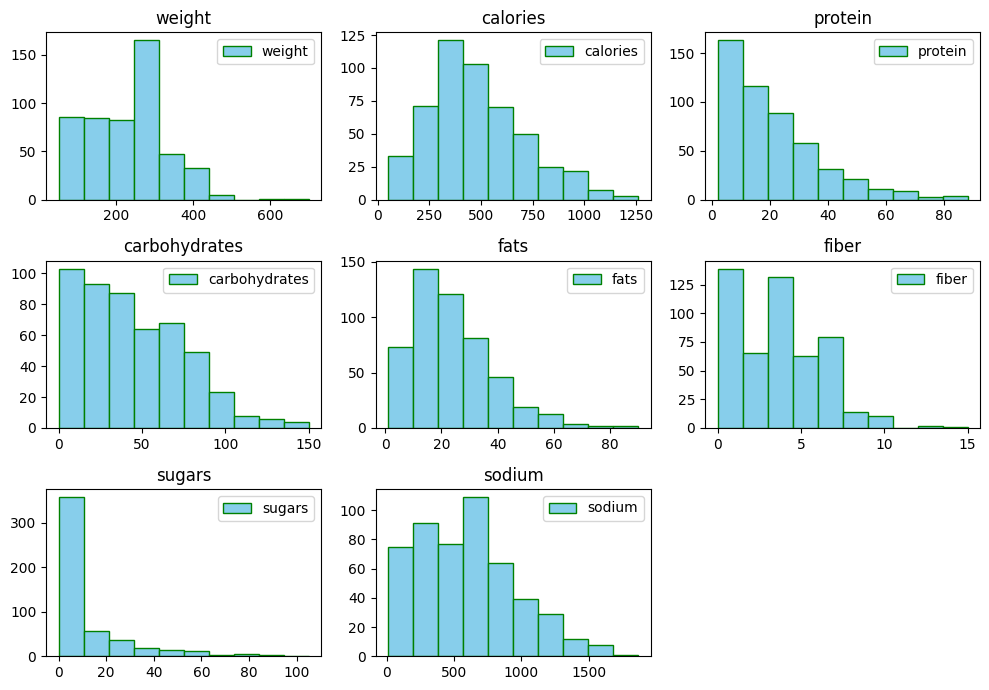

In [5]:
nutrition_df.hist(bins=10, grid=False, color='skyblue', edgecolor="green",legend=True,figsize=(10,7))
plt.tight_layout()
plt.show()

<Axes: >

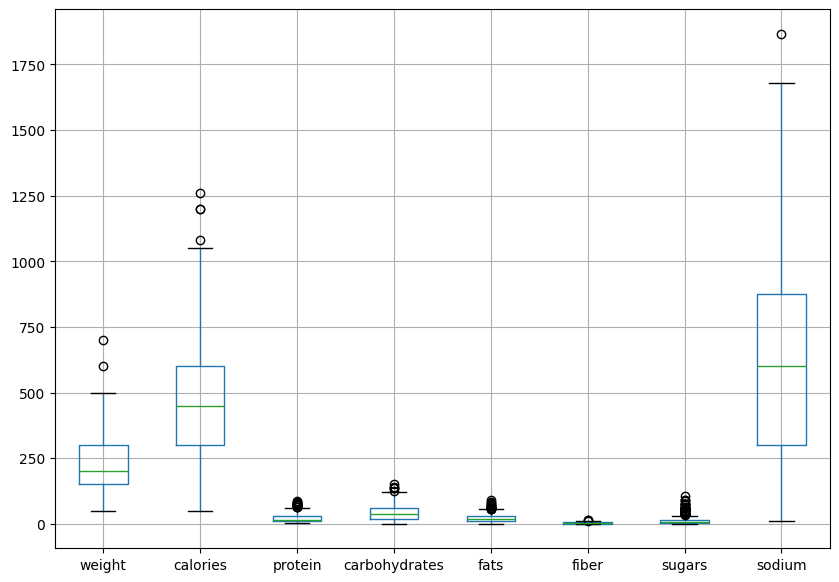

In [6]:
nutrition_df.boxplot(figsize=(10,7))

In [ ]:
# def scattor_plot(df,col):
#     for i in n

<Axes: >

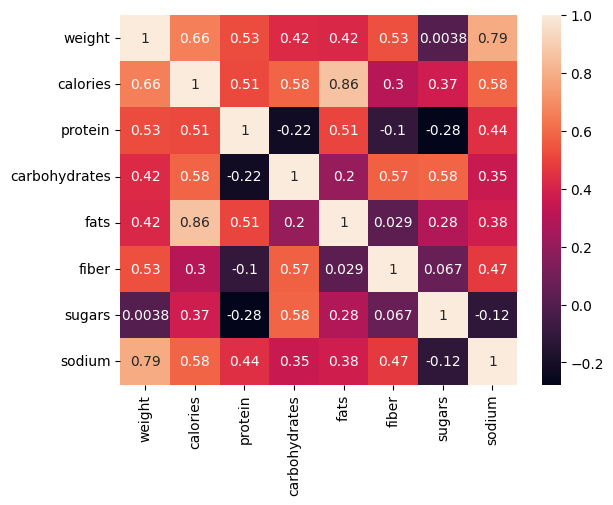

In [7]:
sns.heatmap(nutrition_df.corr(numeric_only=True),annot=True)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# nutrition_df['label']=le.fit_transform(nutrition_df['label'])
# Nutrition_label=le.inverse_transform(nutrition_df['label'])
# mapping = pd.DataFrame({'Encoded Value': range(len(le.classes_)), 'Original Label': le.classes_},index=True)
# print(mapping.to_string(index=False))


In [8]:
Nutrition_label = {}
encoder = LabelEncoder()
nutrition_df['label'] = encoder.fit_transform(nutrition_df['label'])
Nutrition_label['label'] = encoder
label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Encoding completed and encoder stored.")
with open('label_encoder.pkl', 'wb') as f:
    p.dump(encoder, f)

Encoding completed and encoder stored.


In [9]:
nutrition_df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,505.0,50.000000,29.183669,0.0,25.0,50.0,75.0,100.0
weight,505.0,227.207921,102.593000,50.0,150.0,200.0,300.0,700.0
calories,505.0,481.380198,230.066679,50.0,300.0,450.0,600.0,1260.0
protein,505.0,21.215842,16.294869,2.0,9.0,16.0,30.0,88.0
carbohydrates,505.0,41.863366,30.577431,0.0,18.0,38.0,60.0,150.0
fats,505.0,23.689109,14.782295,1.0,12.0,20.0,30.0,90.0
fiber,505.0,3.310891,2.587435,0.0,1.0,3.0,5.0,15.0
sugars,505.0,12.708911,16.656319,0.0,3.0,6.0,15.0,105.0
sodium,505.0,595.849505,373.087777,10.0,300.0,600.0,875.0,1867.0


In [ ]:
X = df.drop(['label', 'calories'], axis=1)
y = df['calories']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
display(results_df)
MSE	R2

In [10]:
x = nutrition_df.drop(columns=['calories'])
y = nutrition_df['calories']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
print({'x_train': x_train.shape,'x_test': x_test.shape,'y_train': y_train.shape,'y_test': y_test.shape})

{'x_train': (404, 8), 'x_test': (101, 8), 'y_train': (404,), 'y_test': (101,)}


In [11]:
Scalling=MinMaxScaler()
col=['weight', 'protein', 'carbohydrates', 'fats', 'fiber','sugars', 'sodium']
nutrition_df[col] = Scalling.fit_transform(nutrition_df[col])

In [47]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
sr = SVR()
def regression(model, x, y):
    if isinstance(model, (LinearRegression, RandomForestRegressor,SVR)):
        model.fit(x, y)
        return model
    else:
        raise ValueError("Invalid model type. Use LinearRegression, DecisionTreeRegressor, or RandomForestRegressor.")
def report(model, X, y):
    predict = model.predict(X)
    r2 = r2_score(y, predict)
    rmse = mean_squared_error(y, predict)
    mae = mean_absolute_error(y, predict)
    adj_r2 = 1 - ((1 - r2) * (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1))
    return [r2, rmse, mae, adj_r2]
# Train all models
models = {"lr": lr,"rf": rf,'svr':sr}
train_predion = []
test_predion=[]
for model_name, model in models.items():
    trained_model = regression(model, x_train, y_train)
    train_predion.append(report(trained_model, x_train, y_train))
for model_name, model in models.items():
    tes_model = regression(model, x_test, y_test)
    test_predion.append(report(trained_model, x_test, y_test))

In [48]:
Train_Data_Report = pd.DataFrame(train_predion, index=models.keys(), columns=['r2', 'rmse', 'mae', 'adj_r2'])
Test_Data_Report=pd.DataFrame(test_predion, index=models.keys(),columns=['r2', 'rmse', 'mae', 'adj_r2'])
Test_Data_Report

,r2,rmse,mae,adj_r2
lr,0.120478,53335.263150,174.092853,0.043998
rf,0.120478,53335.263150,174.092853,0.043998
svr,0.011427,59948.294866,189.088629,-0.074536


In [49]:
Train_Data_Report

,r2,rmse,mae,adj_r2
lr,0.992394,385.837007,14.567950,0.992240
rf,0.995331,236.873850,10.528292,0.995236
svr,0.192002,40990.124421,159.605951,0.175637


In [53]:
from pickle import dump

with open('model.pkl', 'wb') as file:
    dump(rf, file)

In [ ]:
from pickle import load

with open('model.pkl', 'rb') as file:
    model = load(file)

1

In [58]:
nutrition_df.columns

Index(['label', 'weight', 'calories', 'protein', 'carbohydrates', 'fats',
       'fiber', 'sugars', 'sodium'],
      dtype='object')